In [ ]:
# ===========================
# 1. LOAD LIBRARIES
# ===========================
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import re

In [ ]:
# ============================================
# LOAD YOUR UPLOADED FILES
# (These paths work because you already uploaded them)
# ============================================
gdf = gpd.read_file('california-congressional-districts.geojson')
df  = pd.read_csv('CA_Legislative_Districts.csv')

In [ ]:
# ============================================
# CLEAN & EXTRACT DISTRICT NUMBERS
# GeoJSON only has "Name", so we extract digits from it
# ============================================
def extract_number(text):
    match = re.search(r'\d+', text)
    return str(int(match.group())) if match else None

gdf["DISTRICT"] = gdf["Name"].apply(extract_number)

# Match formatting: "1" → "01"
gdf["DISTRICT"] = gdf["DISTRICT"].astype(int).astype(str).str.zfill(2)
df["DISTRICT"]  = df["DISTRICT"].astype(str).str.zfill(2)

In [ ]:
# ============================================
# MERGE POPULATION INTO GEOJSON
# ============================================
merged = gdf.merge(df[["DISTRICT", "POPULATION"]], on="DISTRICT", how="left")

<Figure size 1000x1000 with 0 Axes>

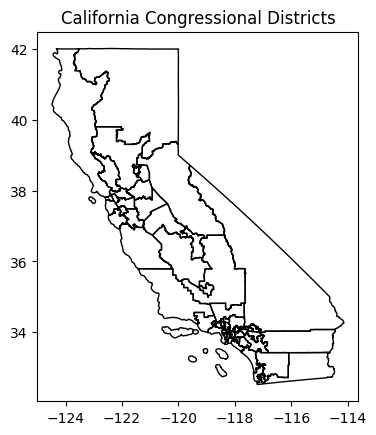

In [ ]:
# ============================================
# 1. BASE MAP — CALIFORNIA CONGRESSIONAL DISTRICTS
# ============================================
plt.figure(figsize=(10, 10))
merged.plot(edgecolor="black", facecolor="none")
plt.title("California Congressional Districts")
plt.show()

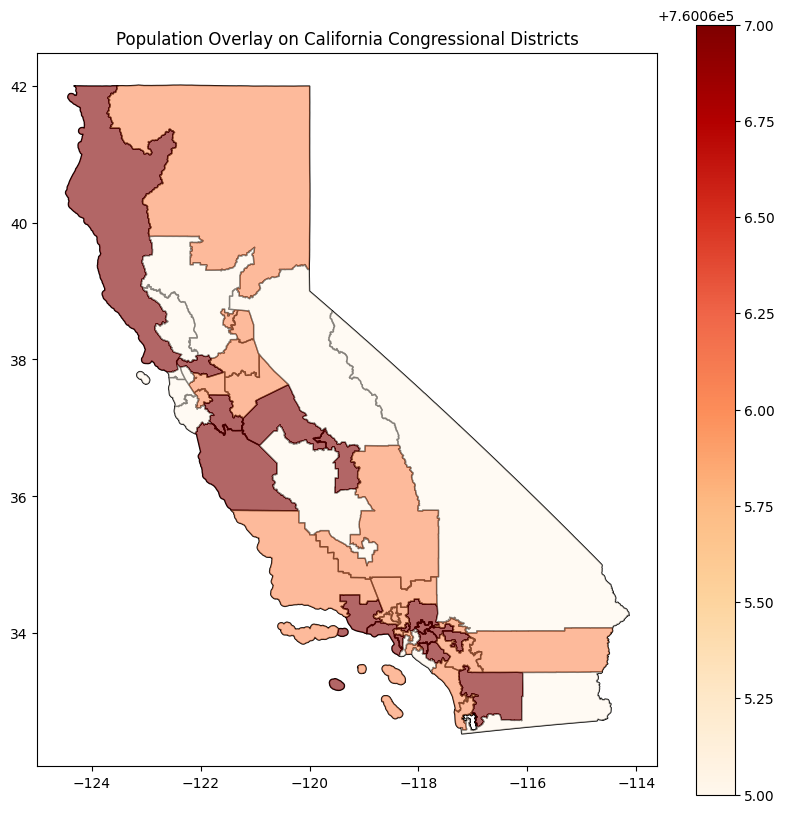

In [ ]:
# ============================================
# 2. POPULATION OVERLAY MAP
# ============================================
fig, ax = plt.subplots(figsize=(10, 10))

# district outlines
merged.plot(ax=ax, edgecolor="black", facecolor="none")

# population shading overlay
merged.plot(
    ax=ax,
    column="POPULATION",
    cmap="OrRd",
    legend=True,
    alpha=0.6
)

plt.title("Population Overlay on California Congressional Districts")
plt.show()

<Figure size 1000x1000 with 0 Axes>

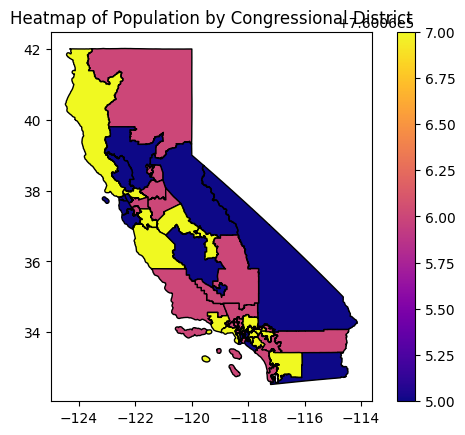

In [ ]:
# ============================================
# 3. POPULATION HEATMAP (CHOROPLETH)
# ============================================
plt.figure(figsize=(10, 10))
merged.plot(
    column="POPULATION",
    cmap="plasma",
    legend=True,
    edgecolor="black"
)
plt.title("Heatmap of Population by Congressional District")
plt.show()